# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.
<br><br>


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# read data csv.
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# find rows with the shape method.
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
# show the number of the unique users.
df["user_id"].nunique()

290584

**d.** The proportion of users converted.

In [5]:
# the proportion of the users who converted.
len(df.query( 'converted == 1')) /df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# the number of the 'group' is 'treatment' but not 'landing' in the new page.
len(df.query("group == 'treatment' & landing_page != 'new_page'"))

1965

In [61]:
# the number of the 'group' is 'treatment' but not 'landing' in the new page, 
# and 'group' is 'control' but not 'landing' in the old page.
len(df.query("group == 'treatment' & landing_page != 'new_page'")) + \
len(df.query("group == 'control' & landing_page != 'old_page'"))

3893

**f.** Do any of the rows have missing values?

In [62]:
# checking if there is missing data.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**Do not have any missing data**

In [7]:
# another  way to check if there is missing values
df.duplicated().sum()

0

### ToDo 1.2  

Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# droping the groups of treatment that not landing in the new page, and groups of control that not landing in old page.
df = df.drop((df.query("group == 'treatment' & landing_page != 'new_page'")).index)  
df2 = df.drop((df.query("group == 'control' & landing_page != 'old_page'")).index)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
#The number of unique user_ids in df2.
df2["user_id"].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# show the row is repeated.
df2[df2["user_id"].duplicated(keep = False)]['user_id'].unique()

array([773192])

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
# display the duplicated rows in the user_id.
df2.loc[df2.user_id.duplicated(keep = False) ,:]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates(subset = 'user_id' , keep = 'first' , inplace = True)

In [15]:
# Check again if the row with a duplicate user_id is deleted or not.
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [71]:
# verify the duplicate number has been deleted.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [18]:
# the probability of converted rate in the population.
len(df2[df2['converted']==1])/df2.shape[0]

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# chek the converted individual in the control group. 
control_rate = len(df2.query("group == 'control' & converted == 1"))/(len(df2.query("group == 'control'")))
print(control_rate)

0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# chek the converted individual in the treatment group. 
treatment_rate = len(df2.query("group == 'treatment' & converted == 1"))/(len(df2.query("group == 'treatment'")))
print(treatment_rate)

0.11880806551510564


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [22]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_rate - control_rate 
print(obs_diff)

-0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [23]:
# chek the rate of the individual that received the new page.
len(df2.query("landing_page == 'new_page'"))/ df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

 **Given the probability that an individual received the new page is 0.5006, it almost the same that individual received the old page, we have an equal chance here.**<br>
 **The probability of conversion from the control and treatment group have almost a similar rate, just a little different i point it in the code (obs_diff).**<br>
 **In this situation, we can't say that the new treatment group leads to more conversions.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

 * ****The matrice i will use $p_{old}$ and $p_{new}$****

***Null Hypotheses : we assume the null to be true be for analyzing the data, 
that the probability for the old page is greater or equal than the new page.***<br>
***Alternative Hypotheses : is the neaw page is better or greater than the old page.***<br>


$$H_0 : p_{new} - p_{old} \leq 0 $$
$$H_1 : p_{new} - p_{old} > 0 $$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [25]:
# prbability of converting rate to the new page.
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [26]:
# converting rate to the old page.
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [27]:
# Calculating the difference between the new and old pages.
# we assume that  p_new  and  p_old  both are equal to the converted success rate in the df2 data regardless of the pages,
# so the difference between them is 0.
p_diff = p_new - p_old
p_diff

0.0

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br>


In [29]:
# total number of individuals in the treatment group, (new page).
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [30]:
# total number of individuals in the control group, (old page).
n_old = df2.query('group == "control"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 


In [34]:
# Simulate a Sample for the treatment Group under the null hypothesis.
new_page_converted = np.random.choice(a=[0, 1], size=n_new, replace=True, p=[1-p_new, p_new])
new_page_converted.mean()

#new_page_converted = np.random.binomial(1, p_new, n_new)
#new_page_converted.mean()

0.11888376574220631

**f. Simulate Sample for the `control` Group** <br>

In [35]:
# Simulate a Samplhe control Group under the null hypothesis.
old_page_converted = np.random.choice(a=[0, 1], size=n_old, replace=True, p=[1-p_old, p_old])
old_page_converted.mean()

#old_page_converted = np.random.binomial(1, p_old, n_old)
#old_page_converted.mean()

0.12094387158059942

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [36]:
# converting the difference between the new and old page.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

-0.0020601058383931115


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 



In [37]:
# Sampling distribution , bootstrapping the new and old page converted in range (10000).
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice(a=[0, 1], size=n_new, replace=True, p=[1-p_new, p_new])
    old_page_converted = np.random.choice(a=[0, 1], size=n_old, replace=True, p=[1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>


In [38]:
# percentile of lower and upper bound.
np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

(-0.0044273952962358308, 0.00025906672649098934)

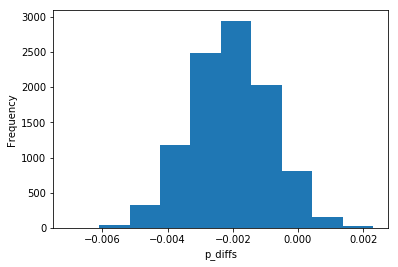

In [39]:
# convert to numpy array.
p_diffs = np.array(p_diffs)

# plotting the difference between the new and old page.
plt.hist(p_diffs);
plt.legend()
plt.xlabel('p_diffs')
plt.ylabel('Frequency');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

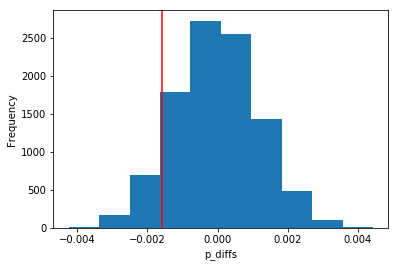

In [40]:
# simulate distribution under the null hypothesis.
null_vals = np.random.normal(0, p_diffs.std(), 10000)

# Plotting the null distribution.
plt.hist(null_vals)
plt.axvline(x= obs_diff, color= 'r')
plt.xlabel('p_diffs')
plt.ylabel('Frequency');

In [41]:
# compute p value.
p_value = (null_vals > obs_diff).mean()
p_value

0.90190000000000003

**k.** Please explain in words what you have just computed in part **j** above.  


- What is this value called in scientific studies? <br> 
***This value called p-value in scientific studies.***<br><br>

- What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)".<br>
***The p-value is the probability of getting our statistic or a more extreme value if the null hypotheses is true.***<br>
***In our case here the (p-value > 0.05), so we fail to reject the null.***<br>



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 


In [47]:
import statsmodels.api as sm

# number of conversions with the old_page and new_page.
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
convert_old , convert_new

(17489, 17264)

In [48]:
# number of individuals who were shown the old_page and new_page.
n_old , n_new

(145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [49]:
import statsmodels.api as sm

# ToDo: Complete the sm.stats.proportions_ztest() method arguments
# comparing the z_scor and p_value to decide if we going to reject the null, or fail to reject the null.
z_score, p_value = sm.stats.proportions_ztest([convert_old , convert_new], [n_old , n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


***The 𝑍-score and the p_value means that one fail to reject the Null, The null being converted rate for the old page is the same or greater than the new page.***<br>
***𝑍0.05  is 1.645 for one-tailed tests, and 𝑍𝑠𝑐𝑜𝑟𝑒 is 1.31, than 𝑍𝑠𝑐𝑜𝑟𝑒 lies in the rejection region in the distribution.***<br>
***We still agree with the findings in parts j. and k.***<br>

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

***A Logistic regression***: it is a regression approach used to predict only two possible outcomes.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [52]:
# quick check for the data.
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [53]:
# dummy variables.
df2[['control', 'treatment']]= pd.get_dummies(df['group'])
df2 = df2.drop('control', axis= 1)

# rename the treatment column to ab_page.
df3 = df2.rename(columns= {'treatment': 'ab_page'})
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [54]:
# instantiate logistic regression model.
df3['intercept']= 1

# fit the model.
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
# get summary statistics.
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-12 06:50 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 


***The p_value associated with ab_page is 0.19, it is greater than 0.05. The coefficient is not statistical significant.***

***The p_value is different. In part II the p_value is 0.91 and in part III the p_value is 0.19. This might be because the regression model tests are assumed to be an intercept, and maybe because of the differences in one or two-tailed testing.***

***In part II because the new_page is less than the old_page, this assumes a one-tailed test. so Part III assumes to be a two-tailed test because we explore only two possible outcomes it can go either way of the poth .***

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?<br><br> 

***It is a good idea to consider other features in my regression model to identify other potential influences.***

***The disadvantage to adding additional terms into my regression model, are the additional terms are not related to the model, and the model gets more complicated.***

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


In [57]:
# Read the countries.csv
df_countries =pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [58]:
# Join with the df3 dataframe
df_merged = df_countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [59]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']]= pd.get_dummies(df_merged['country'])
df_merged = df_merged.drop('CA', axis= 1)

df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [64]:
# instantiate logistic regression model.
df_merged['intercept']= 1

# Fit your model, and summarize the results
logit_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
results = logit_mod2.fit()

#get summary statistics.
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-12 07:36 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

***The p_value for countries is >0.05, we still fail to reject the null.***

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 





In [66]:
# interaction between page and country.
df_merged['UK_new_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['US_new_page'] = df_merged['US'] * df_merged['ab_page']

df_merged.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,UK_new_page,US_new_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [67]:
df_merged['intercept']= 1

logit_mod3 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page', 'UK', 'US', 'UK_new_page', 'US_new_page']])
results = logit_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [68]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-12 07:36 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_new_page    0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_new_page    0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

>**The p_value for the interaction between country & page is >0.05, we still fail to reject the null. The interaction does not have a statistically significant on the conversion rate.**

<a id='Conclusions'></a>
## Conclusions
<br>***From our A/B test project, we tried to understand whether the company should set with the new page or keep with the old page.***<br>

***Part I in probability:***<br>
- ***Given the probability that an individual received the new page is 0.5006, it is almost the same that individual received the old page we have an equal chance here.***<br>
- ***In this situation, we can't say that the new treatment group leads to more conversions.***<br>

***Part II in A/B test:***<br>
- ***we test our hypothesis to test the new page is better than the old page.***<br>
- ***we found that the p-value is 0.901, and it is greater than the alpha of 0.05***<br>
- ***By using the z-score and p-value with the z-test we still fail to reject the null. And we still keep the old page.***<br><br>
 
- In this case, I will test the logistic regression model to see if there is any difference<br><br> 

***Part III in logistic regression:***<br>
- ***We looking for exploring possible outcomes to make sure if the new page is better or not.***<br>
- ***The p_value associated with ab_page (the new page) is 0.19, Which is greater than 0.05. The coefficient is not statistically significant.***<br>
- ***We tried to find the effect based on which country a user lives in***<br>
- ***And we looked at an interaction between page and country to see if are there any significant effects on conversion, we figured out that the p-value is still  >0.05.***<br>
- ***So for the country a user lives in or the interaction between page and country, We are failing to reject the null.***<br><br>
***Considering all the tests we got through till now, We fail to reject the null. And we are going to keep the old page***<br>
***suggest that the best to focus on is developing another new landing page.***




## Resources
***Resources I focused in with:***<br>
- Practical statistics for data scientists[book].<br>
- An Introduction to Statistical Learning with Applications in R (chapter 3)[book].<br>
- StatQuest [YouTube].<br>





<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])